In [32]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import chainer
from chainer import Chain, Variable
from net import NeuralProcesses

In [33]:
# Parameters
n_h = 3
n_r = 3
n_z = 3
gpu = None

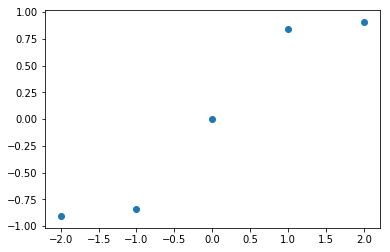

In [34]:
x = np.array([[-2,-1,0,1,2]]).astype(np.float32).T
y = np.sin(x).astype(np.float32)
plt.scatter(x,np.sin(x))

### Training

In [35]:
# construct model and ship to GPU
model = NeuralProcesses(1,1, n_h, n_r, n_z)

# set up the optimizer
opt = chainer.optimizers.Adam()
opt.setup(model)

In [36]:
posteriors = []
x_pred = Variable(np.linspace(-4,4,200).astype(np.float32)[:,np.newaxis])
for epoch in range(3000):
    # fetch the next batch of data
    idx = np.random.choice([0,1,2,3,4],np.random.randint(low=1,high=5),replace=False)
    xb_target = Variable(x[idx,:])
    xb_context = Variable(np.delete(x,idx)[:,np.newaxis])
    yb_target = Variable(y[idx,:])
    yb_context = Variable(np.delete(y,idx)[:,np.newaxis])

    # forwad
    rec_loss, kl = model.train(xb_context,yb_context,xb_target,yb_target)

    # evaluate the binary cross entropy loss
    loss = (rec_loss + kl)
    lossf = loss.data

    # backward/update
    model.cleargrads()
    loss.backward()
    opt.update()
    if epoch % 100 == 0:
        print("epoch %d : loss: %f" % (epoch, lossf))
        dec_mu, dec_ln_var = model.posterior(Variable(x), Variable(y), x_pred, n_draws=50)
        posteriors.append(dec_mu)

epoch 0 : loss: 2.834171
epoch 100 : loss: 1.213104
epoch 200 : loss: 3.371670
epoch 300 : loss: 3.194992
epoch 400 : loss: 1.976254
epoch 500 : loss: 0.980698
epoch 600 : loss: 2.374140
epoch 700 : loss: 1.030637
epoch 800 : loss: 0.986738
epoch 900 : loss: 0.499718
epoch 1000 : loss: 1.037625
epoch 1100 : loss: 0.019026
epoch 1200 : loss: -0.263229
epoch 1300 : loss: -0.950930
epoch 1400 : loss: -0.738357
epoch 1500 : loss: -0.662026
epoch 1600 : loss: -0.799825
epoch 1700 : loss: -0.291698
epoch 1800 : loss: -1.446193
epoch 1900 : loss: -0.802529
epoch 2000 : loss: -1.407680
epoch 2100 : loss: -0.651913
epoch 2200 : loss: -1.215341
epoch 2300 : loss: -1.181521
epoch 2400 : loss: -1.455550
epoch 2500 : loss: -3.238666
epoch 2600 : loss: -1.986173
epoch 2700 : loss: -4.175059
epoch 2800 : loss: -1.500164
epoch 2900 : loss: -5.061707


### Plot

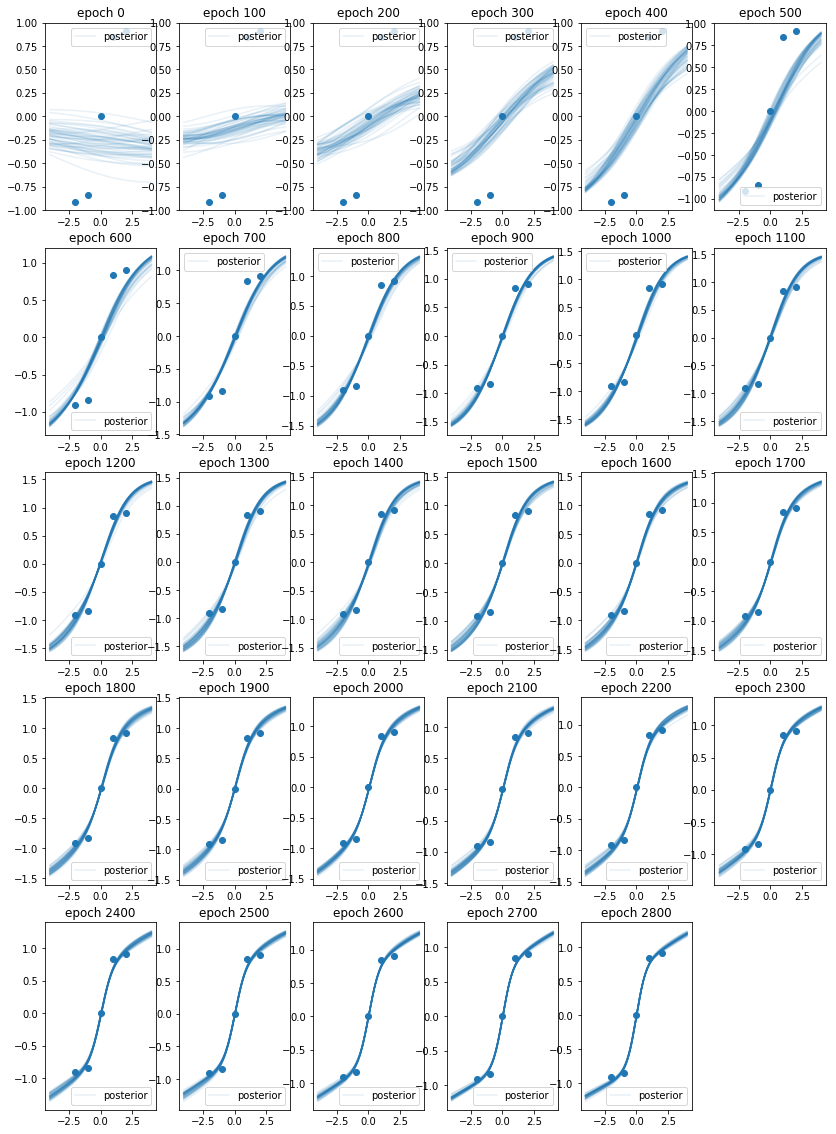

In [37]:
plt.figure(figsize=(14, 20))
for fig in range(1,len(posteriors)):
    plt.subplot(5,6,fig)
    for i, pos in enumerate(posteriors[fig]):
        label = None
        if i == 0:
            label = "posterior"
        plt.plot(x_pred.data, pos.data.T, label=label, alpha=.1,color="C0")
    plt.plot(x, y, "o")
    plt.title("epoch " + str(100*(fig-1)))

    plt.legend()